**题目1：**天文学家要确定一颗小行星围绕太阳运行的轨道，在轨道平面内建立以太阳为原点的直角坐标系，在两坐标轴上去天文测量单位(一天文单位为地球到太阳的平均距离：9300公里)。在五个不同的时间点对小行星作了观察，测得轨道上五个点的坐标数据如下：

|x|$4.5596$|$5.0816$|$5.5546$|$5.9636$|$6.2756$|
|-|-|-|-|-|-|
|y|$0.8145$|$1.3685$|$1.9895$|$2.6925$|$3.5265$|

由开普勒第一定律知，小行星轨道为一椭圆。设方程为$$a_1x^2+2a_2xy+a_3y^2+2a_4x+2a_5y+1=0$$
使确定椭圆的方程并在轨道的平面内以太阳为原点绘出椭圆曲线。并应用坐标平移变换和正交变换将上例题中的二次曲线方程化为标准方程，绘图样轨道图，完成小行星运行的动态模拟。


解得方程
-0.34x^2+2*0.19*xy+-0.38y^2+2*0.46x+2*0.41y+1=0
坐标平移
x=x_2+2.72
y=y_2+2.42
-0.10x^2+2*0.06*xy+-0.12y^2+1=0
正交变换
0.05x^2+0.17y^2=1
坐标映射
(4.56,0.81) -> (-0.30,2.42)
(5.08,1.37) -> (-1.06,2.36)
(5.55,1.99) -> (-1.83,2.21)
(5.96,2.69) -> (-2.60,1.96)
(6.28,3.53) -> (-3.39,1.54)


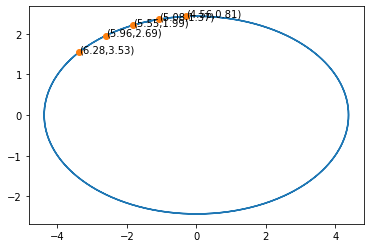

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x=np.array([4.5596,5.0816,5.5546,5.9636,6.2756])
y=np.array([0.8145,1.3685,1.9895,2.6925,3.5265])

#解方程
a=np.mat([x**2,2*x*y,y**2,2*x,2*y]).T
b=np.mat([-1]*5).T
solve=np.linalg.lstsq(a,b,rcond=None)[0].reshape(1,-1).getA()[0]
print("解得方程")
print("%.2fx^2+2*%.2f*xy+%.2fy^2+2*%.2fx+2*%.2fy+1=0"%tuple(solve))

#坐标平移
#x=x_2+k_1
#y=y_2+k_2
#
#a_1*k_1+a_2*k_2+a_4=0
#a_2*k_1+a_3*k_2+a_5=0
print("坐标平移")
a=np.mat([[solve[0],solve[1]],
      [solve[1],solve[2]]])
b=np.mat([-solve[3],-solve[4]]).T
k=np.linalg.lstsq(a,b,rcond=None)[0]
k_1=k[0,0]
k_2=k[1,0]
print("x=x_2+%.2f"%k_1)
print("y=y_2+%.2f"%k_2)
k=solve[0]*(k_1**2)+solve[2]*(k_2**2)+2*solve[1]*k_1*k_2+2*solve[3]*k_1+2*solve[4]*k_2+1
a_1=solve[0]/k
a_2=solve[1]/k
a_3=solve[2]/k
print("%.2fx^2+2*%.2f*xy+%.2fy^2+1=0"%(a_1,a_2,a_3))

#正交变换
#a_1*x_2**2+2*a_2*x_2*y_2+a_3*y_3**2+1=0
#求特征值和特征向量
#x_2=[x_3,y_3]*featurevector[0]
#y_2=[x_3,y_3]*featurevector[1]

print("正交变换")
a=np.mat([[-a_1,-a_2],[-a_2,-a_3]])
eigenvalue,featurevector=np.linalg.eig(a)
mat=(featurevector.T*a*featurevector)
a_1=mat[0,0]+mat[1,0]
a_3=mat[0,1]+mat[1,1]
print("%.2fx^2+%.2fy^2=1"%(a_1,a_3))

print("坐标映射")
mov_x=x-k_1
mov_y=y-k_2
featurevector_I=featurevector.I
map_x=featurevector_I[0,0]*mov_x+featurevector_I[0,1]*mov_y
map_y=featurevector_I[1,0]*mov_x+featurevector_I[1,1]*mov_y
for i in range(len(x)):
  print("(%.2f,%.2f) -> (%.2f,%.2f)"%(x[i],y[i],map_x[i],map_y[i]))

plt.figure()
t=np.arange(-2*np.pi,2*np.pi,0.01)
plt_x=np.sin(t)/np.sqrt(a_1)
plt_y=np.cos(t)/np.sqrt(a_3)
plt.plot(plt_x,plt_y)
plt.plot(map_x,map_y,'o')
for i in range(len(x)):
  plt.text(map_x[i],map_y[i],'(%.2f,%.2f)'%(x[i],y[i]))
plt.show()

**题目2：**价格指数是反应价格水平的总体变化的一种统计指数，经常被用以检测宏观经济中物价的波动形势。2006年1-6月我国企业商品价格指数的统计数据如下表。试建立多元线性回归模型：$y=\beta_0+\beta_1x_1+\beta_2x_2$，并估计回归系数$\beta_0$、$\beta_1$和$\beta_2$。若又知2006年7月农产品价格指数为$101$，矿产品价格指数为$111$，试上述关系预测2006年7月的价格总指数。

|日期|总指数$y$|农产品$x_1$|矿产品$x_2$|
|----|---------|-----------|-----------|
|2006年1月|$101.1$|$101.3$|$105.6$|
|2006年2月|$100.7$|$100.0$|$109.0$|
|2006年3月|$100.8$|$101.0$|$107.9$|
|2006年4月|$101.0$|$101.2$|$107.6$|
|2006年5月|$101.5$|$100.8$|$108.9$|
|2006年6月|$102.3$|$102.7$|$110.6$|

In [112]:
import numpy as np

x_1=[101.3,100.0,101.0,101.2,100.8,102.7]
x_2=[105.6,109.0,107.9,107.6,108.9,110.6]
y=[101.1,100.7,100.8,101.0,101.5,102.3]
a=np.mat([[1]*6,x_1,x_2]).T
b=np.mat(y).T
solve=np.linalg.lstsq(a,b,rcond=None)[0].reshape(1,-1).getA()[0]
print("计算得：y=%.2f+%.2fx_1+%.2fx_2"%tuple(solve))
y_2=sum(np.array(solve)*np.array([1,101,111]))
print("当x_1=101，x_2=111时，y=%.2f"%y_2)

计算得：y=37.03+0.49x_1+0.13x_2
当x_1=101，x_2=111时，y=101.51
